In [275]:
import pandas as pd


In [276]:
import numpy as np

In [277]:
import matplotlib.pyplot as plt

In [278]:
import seaborn as sns

In [279]:
import warnings

In [280]:
warnings.filterwarnings('ignore')

In [281]:
df=pd.read_csv('bigdatamart_Train.csv')

In [282]:
df_test=pd.read_csv('bigdatamart_Test.csv')

In [283]:
df.shape

(8523, 12)

In [284]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Item visibility has zero value which is not possible

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


item_weight and outlet_size have zero values which is not possible

In [286]:
df.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

skewness is present in Item_outlet_sales 

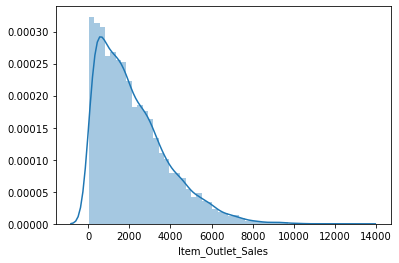

In [287]:
sns.distplot(df['Item_Outlet_Sales'])

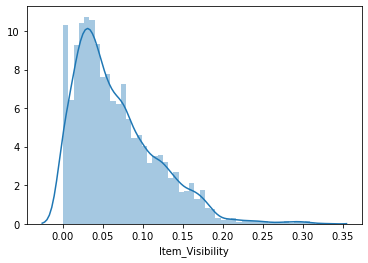

In [288]:
sns.distplot(df['Item_Visibility'])

skewness is seen in graph as well

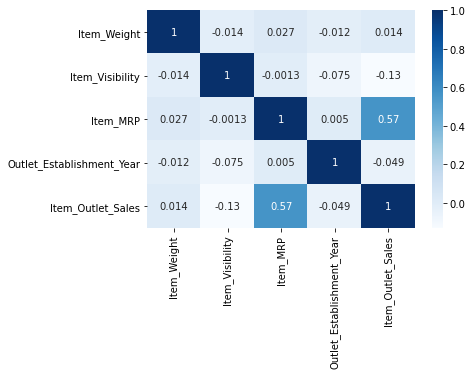

In [289]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

item_visibility and item outlet sales are negatively correlated which is not possible. We must remove this error

In [290]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

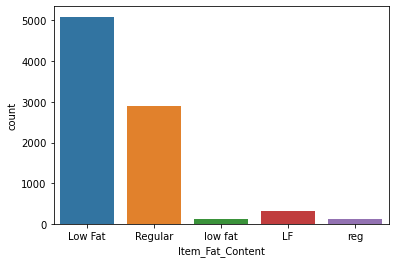

In [291]:
sns.countplot(df['Item_Fat_Content'])

Only two type of fat content is there. LF reg and low fat are typo errors 

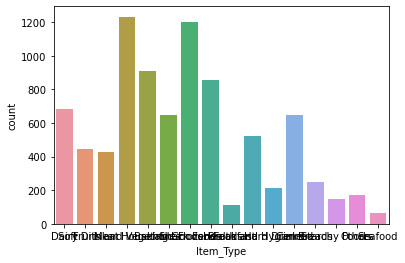

In [292]:
sns.countplot(df['Item_Type'])

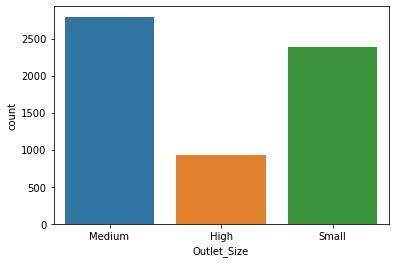

In [293]:
sns.countplot(df['Outlet_Size'])

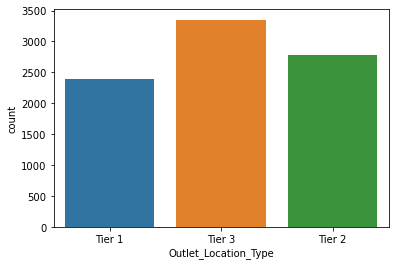

In [294]:
sns.countplot(df['Outlet_Location_Type'])

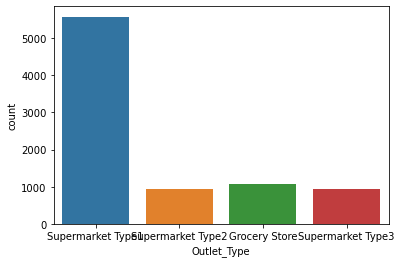

In [295]:
sns.countplot(df['Outlet_Type'])

In [296]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [297]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [298]:
df_test.shape

(5681, 11)

In [299]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [300]:
df_test['Item_Outlet_Sales']=0
df_test.shape

(5681, 12)

In [301]:
new_df=pd.concat([df,df_test],ignore_index=True)
new_df.shape

(14204, 12)

In [302]:
new_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [303]:
new_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [304]:
new_df['Item_Weight']=new_df['Item_Weight'].replace(np.NaN,new_df['Item_Weight'].mean())

In [305]:
new_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replaced missing item weights with mean weight

In [306]:
from scipy.stats import mode

In [307]:
mod=mode(new_df['Outlet_Size'])

In [308]:
mod

ModeResult(mode=array(['Medium'], dtype=object), count=array([4655]))

In [309]:
new_df['Outlet_Size']=new_df['Outlet_Size'].replace(np.NaN,'Medium')

In [310]:
new_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

replaced Outlet size missing data with mode-Medium

In [311]:
new_df['Item_Visibility']=new_df['Item_Visibility'].replace(0,new_df['Item_Visibility'].mean())

In [312]:
new_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


zeroes in item visibility removed

In [313]:
new_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [314]:
new_df['Item_Fat_Content']=new_df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [315]:
new_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [316]:
new_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [317]:
from sklearn.preprocessing import LabelEncoder

In [318]:
LE=LabelEncoder()

In [319]:
object=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier','Outlet_Identifier']

In [320]:
for i in object:
    new_df[i]=LE.fit_transform(new_df[i])

In [321]:
new_df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [322]:
new_df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [323]:
new_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,1121,19.20,1,0.065953,6,182.0950,0,1,2,0,732.3800
4,1297,8.93,0,0.065953,9,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,1,0.013496,13,141.3154,8,2,0,1,0.0000
14200,308,7.60,1,0.142991,15,169.1448,3,1,2,2,0.0000
14201,1426,10.00,0,0.073529,8,118.7440,7,1,1,1,0.0000
14202,521,15.30,1,0.065953,3,214.6218,2,1,1,1,0.0000


In [324]:
new_df.shape

(14204, 11)

Dropping outlet establishment year which has no relation to sales

In [325]:
x=new_df.drop('Item_Outlet_Sales',axis=1)

In [326]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1,0,1
3,1121,19.20,1,0.065953,6,182.0950,0,1,2,0
4,1297,8.93,0,0.065953,9,53.8614,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,1,0.013496,13,141.3154,8,2,0,1
14200,308,7.60,1,0.142991,15,169.1448,3,1,2,2
14201,1426,10.00,0,0.073529,8,118.7440,7,1,1,1
14202,521,15.30,1,0.065953,3,214.6218,2,1,1,1


In [327]:
y=new_df['Item_Outlet_Sales']

In [328]:
y

0        3735.1380
1         443.4228
2        2097.2700
3         732.3800
4         994.7052
           ...    
14199       0.0000
14200       0.0000
14201       0.0000
14202       0.0000
14203       0.0000
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [329]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.linear_model import Lasso,Ridge

from sklearn.svm import SVR

from sklearn.linear_model import ElasticNet

In [330]:
maxScore=0
maxRS=0

In [331]:
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    score=mod.score(x_train,y_train)
    mod.coef_
    pred=mod.predict(x_test)
    if score>maxScore:
        maxScore=score
        maxRS=i
print('Best score is ',maxScore,'on random state',maxRS)

Best score is  0.19754944974986566 on random state 45


In [332]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

lm=LinearRegression()

lm.fit(x_train,y_train)


lm.coef_

lm.score(x_train,y_train)

0.19754944974986566

In [333]:

pred=lm.predict(x_test)

print('Sales is ',pred)

print('Mean Squared error is ',mean_squared_error(y_test,pred))

print('Mean Absolute error is',mean_absolute_error(y_test,pred))


Sales is  [3096.90446715 1457.10013505  913.70301757 ... 1213.19277176 2072.97062614
 2385.89217379]
Mean Squared error is  2419045.4021291067
Mean Absolute error is 1200.9209863754481


In [334]:

from sklearn.metrics import r2_score

print(r2_score(y_test,pred))

ls=Lasso(alpha=0.0001)

ls.fit(x_train,y_train)



lspred=ls.predict(x_test)

lspred



0.15449627348360295


array([3096.90464332, 1457.10115472,  913.7029493 , ..., 1213.19353884,
       2072.96976162, 2385.89601687])

In [335]:
ls.score(x_train,y_train)

0.19754944974828703

In [336]:
ls.coef_

array([-2.08359957e-02,  3.48222118e+00,  1.97781468e+01, -8.21528618e+02,
       -6.68723105e+00,  9.67198041e+00,  4.17230860e+01, -2.18729641e+02,
       -1.28483914e+02,  5.31624846e+02])

In [337]:
print('Mean Absolute error is',mean_absolute_error(y_test,lspred))

Mean Absolute error is 1200.920948580681


In [338]:
rd=Ridge(alpha=0.0001)

rd.fit(x_train,y_train)

rd.score(x_train,y_train)




0.19754944974985544

In [339]:
rd.coef_

array([-2.08361457e-02,  3.48221796e+00,  1.97787498e+01, -8.21568472e+02,
       -6.68724443e+00,  9.67198023e+00,  4.17227721e+01, -2.18729930e+02,
       -1.28485219e+02,  5.31625239e+02])

In [340]:
rdpred=rd.predict(x_test)

rdpred

print('Mean Absolute error is',mean_absolute_error(y_test,rdpred))


Mean Absolute error is 1200.920983199714


In [341]:
enr=ElasticNet(alpha=0.0001)

enr.fit(x_train,y_train)


enr.score(x_train,y_train)



0.1975492050283405

In [342]:
enrpred=enr.predict(x_test)


enrpred

array([3097.12010523, 1457.49192635,  913.71899755, ..., 1213.39779591,
       2072.57361421, 2387.30889482])

In [343]:
print('Mean Absolute error is',mean_absolute_error(y_test,enrpred))

Mean Absolute error is 1200.9055159247787


Best model is linear regression due to high score and least mean absolute error

In [344]:
from sklearn.model_selection import GridSearchCV

parameter={'normalize':[True,False],'fit_intercept':[True,False],'copy_X':[True,False],'positive':[True,False]}

GCV=GridSearchCV(LinearRegression(),parameter,cv=5)

GCV.fit(x_train,y_train)

GCV.best_params_



{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': False}

In [345]:
Final_mod=LinearRegression(copy_X=True,fit_intercept=True,normalize=True,positive=False)

Final_mod.fit(x_train,y_train)

pred=Final_mod.predict(x_test)

In [346]:

Final_mod.score(x_train,y_train)

import joblib

joblib.dump(Final_mod,'Bigmartsales.pkl')

['Bigmartsales.pkl']